# 2) Supervised Segmentation
A U-Net is trained here to perform a semantic segmentation of laser points in the LASTEN data set.

# Import statements
Following packages are necessary:

In [1]:
import random
import utils

import tensorflow as tf
import numpy as np
import segmentation_models as sm

from unet import UNet
from unet import preprocess_input as pre_une
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint
from sklearn.model_selection import train_test_split
from segmentation_models.losses import dice_loss
from segmentation_models.metrics import iou_score
from lastengen import LASTENSequence
from matplotlib import pyplot as plt

Segmentation Models: using `tf.keras` framework.


# Checks
The version of tensorflow as well as the GPU support are checked.

In [3]:
print(tf.__version__)
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2.2.0-rc3


# Data
Import training images

In [4]:
path_train = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN/train'
path_validation = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN/validation'
path_test = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN/test'

width = 384
height = 384

# Seeding
Seeds are set to ensure reproducible training.

In [5]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Network
A U-Net based network is instantiated with keras to run a semantic segmentation.

In [6]:
model = UNet(input_shape=(height, width, 1))
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 384, 384, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 384, 384, 64) 576         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 384, 384, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 384, 384, 64) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

# Data Preparation
The generator sequence for training is built.

In [7]:
image_ids = [3]

train_gen = LASTENSequence(path_train,
                           batch_size=1,
                           image_ids=image_ids,
                           preprocess_input=pre_une,
                           shuffle=False,
                           augment=False,
                           width=width,
                           height=height)

#validation_gen = LASTENSequence(path_validation,
#                                batch_size=8,
#                                preprocess_input=pre_une,
#                                width=width,
#                                height=height)

#test_gen = LASTENSequence(path_train,
#                          batch_size=8,
#                          preprocess_input=pre_une,
#                          width=width,
#                          height=height)

# Training Preparation
Prepare the settings for training the model.

In [8]:
logger = CSVLogger("experiments/segmentation.log")
checker = ModelCheckpoint("experiments/segmentation/weights.{epoch:02d}.hdf5",
                          period=50)

callbacks = [logger, checker]

model.compile(optimizer='adam',
              loss = dice_loss,
              metrics = ['accuracy', iou_score])

# Training
The model is fitted with a generator.

In [ ]:
model.fit_generator(train_gen,
                    epochs=1000,
                    callbacks=callbacks,
                    validation_data=train_gen,
                    validation_freq=1,
                    use_multiprocessing=False,
                    workers=10,
                    max_queue_size=32)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.9954 - accuracy: 0.2953 - iou_score: 0.0023 - val_loss: 0.9961 - val_accuracy: 0.0047 - val_iou_score: 0.0020
Epoch 2/1000
1/1 [==============================] - 1s 513ms/step - loss: 0.9919 - accuracy: 0.5315 - iou_score: 0.0041 - val_loss: 0.9959 - val_accuracy: 0.0021 - val_iou_score: 0.0021
Epoch 3/1000
1/1 [==============================] - 1s 518ms/step - loss: 0.9898 - accuracy: 0.6973 - iou_score: 0.0051 - val_loss: 0.9959 - val_accuracy: 0.0021 - val_iou_score: 0.0021
Epoch 4/1000
1/1 [==============================] - 1s 511ms/step - loss: 0.9881 - accuracy: 0.7441 - iou_score: 0.0060 - val_loss: 0.9959 - val_accuracy: 0.0021 - val_iou_score: 0.0021
Epoch 5/1000
1/1 [==============================] - 1s 521ms/step - loss: 0.9867 - accuracy: 0.7727 - iou_score: 0.0067 - val_loss: 0.9959 - val_accuracy: 0.0021 - val_iou_score: 0.00

1/1 [==============================] - 1s 520ms/step - loss: 0.9359 - accuracy: 0.9799 - iou_score: 0.0331 - val_loss: 0.9967 - val_accuracy: 0.0633 - val_iou_score: 0.0016
Epoch 44/1000
1/1 [==============================] - 1s 514ms/step - loss: 0.9360 - accuracy: 0.9841 - iou_score: 0.0331 - val_loss: 0.9975 - val_accuracy: 0.2708 - val_iou_score: 0.0012
Epoch 45/1000
1/1 [==============================] - 1s 532ms/step - loss: 0.9340 - accuracy: 0.9772 - iou_score: 0.0341 - val_loss: 0.9974 - val_accuracy: 0.7740 - val_iou_score: 0.0013
Epoch 46/1000
1/1 [==============================] - 1s 516ms/step - loss: 0.9318 - accuracy: 0.9794 - iou_score: 0.0353 - val_loss: 0.9975 - val_accuracy: 0.8548 - val_iou_score: 0.0013
Epoch 47/1000
1/1 [==============================] - 1s 636ms/step - loss: 0.9282 - accuracy: 0.9862 - iou_score: 0.0372 - val_loss: 0.9993 - val_accuracy: 0.9792 - val_iou_score: 3.2611e-04
Epoch 48/1000
1/1 [==============================] - 1s 518ms/step - loss: 

Epoch 87/1000
1/1 [==============================] - 1s 510ms/step - loss: 0.8347 - accuracy: 0.9909 - iou_score: 0.0901 - val_loss: 0.9954 - val_accuracy: 0.8690 - val_iou_score: 0.0023
Epoch 88/1000
1/1 [==============================] - 1s 509ms/step - loss: 0.8248 - accuracy: 0.9924 - iou_score: 0.0960 - val_loss: 0.9931 - val_accuracy: 0.9208 - val_iou_score: 0.0035
Epoch 89/1000
1/1 [==============================] - 1s 514ms/step - loss: 0.8105 - accuracy: 0.9921 - iou_score: 0.1047 - val_loss: 0.9941 - val_accuracy: 0.9041 - val_iou_score: 0.0029
Epoch 90/1000
1/1 [==============================] - 1s 510ms/step - loss: 0.8003 - accuracy: 0.9928 - iou_score: 0.1109 - val_loss: 0.9960 - val_accuracy: 0.8202 - val_iou_score: 0.0020
Epoch 91/1000
1/1 [==============================] - 1s 509ms/step - loss: 0.7923 - accuracy: 0.9947 - iou_score: 0.1159 - val_loss: 0.9965 - val_accuracy: 0.8114 - val_iou_score: 0.0017
Epoch 92/1000
1/1 [==============================] - 1s 511ms/ste

Epoch 131/1000
1/1 [==============================] - 1s 511ms/step - loss: 0.5413 - accuracy: 0.9975 - iou_score: 0.2976 - val_loss: 0.9942 - val_accuracy: 0.8328 - val_iou_score: 0.0029
Epoch 132/1000
1/1 [==============================] - 1s 510ms/step - loss: 0.5926 - accuracy: 0.9975 - iou_score: 0.2558 - val_loss: 0.9982 - val_accuracy: 0.8306 - val_iou_score: 8.9695e-04
Epoch 133/1000
1/1 [==============================] - 1s 511ms/step - loss: 0.7020 - accuracy: 0.9983 - iou_score: 0.1751 - val_loss: 0.9992 - val_accuracy: 0.9301 - val_iou_score: 4.0252e-04
Epoch 134/1000
1/1 [==============================] - 1s 513ms/step - loss: 0.5957 - accuracy: 0.9980 - iou_score: 0.2533 - val_loss: 0.9974 - val_accuracy: 0.9918 - val_iou_score: 0.0013
Epoch 135/1000
1/1 [==============================] - 1s 516ms/step - loss: 0.5820 - accuracy: 0.9970 - iou_score: 0.2642 - val_loss: 0.9943 - val_accuracy: 0.9979 - val_iou_score: 0.0028
Epoch 136/1000
1/1 [==============================] 

Epoch 174/1000
1/1 [==============================] - 1s 511ms/step - loss: 0.1906 - accuracy: 0.9994 - iou_score: 0.6798 - val_loss: 0.9991 - val_accuracy: 0.9979 - val_iou_score: 4.5210e-04
Epoch 175/1000
1/1 [==============================] - 1s 513ms/step - loss: 0.1670 - accuracy: 0.9995 - iou_score: 0.7139 - val_loss: 0.9990 - val_accuracy: 0.9979 - val_iou_score: 4.9676e-04
Epoch 176/1000
1/1 [==============================] - 1s 510ms/step - loss: 0.1757 - accuracy: 0.9995 - iou_score: 0.7011 - val_loss: 0.9989 - val_accuracy: 0.9979 - val_iou_score: 5.3685e-04
Epoch 177/1000
1/1 [==============================] - 1s 510ms/step - loss: 0.1485 - accuracy: 0.9996 - iou_score: 0.7413 - val_loss: 0.9989 - val_accuracy: 0.9979 - val_iou_score: 5.5685e-04
Epoch 178/1000
1/1 [==============================] - 1s 509ms/step - loss: 0.1965 - accuracy: 0.9994 - iou_score: 0.6715 - val_loss: 0.9987 - val_accuracy: 0.9979 - val_iou_score: 6.4246e-04
Epoch 179/1000
1/1 [====================

Epoch 217/1000
1/1 [==============================] - 1s 509ms/step - loss: 0.0651 - accuracy: 0.9998 - iou_score: 0.8778 - val_loss: 0.9993 - val_accuracy: 0.9979 - val_iou_score: 3.6244e-04
Epoch 218/1000
1/1 [==============================] - 1s 509ms/step - loss: 0.0645 - accuracy: 0.9998 - iou_score: 0.8788 - val_loss: 0.9992 - val_accuracy: 0.9979 - val_iou_score: 3.7655e-04
Epoch 219/1000
1/1 [==============================] - 1s 510ms/step - loss: 0.0643 - accuracy: 0.9998 - iou_score: 0.8791 - val_loss: 0.9992 - val_accuracy: 0.9979 - val_iou_score: 3.8152e-04
Epoch 220/1000
1/1 [==============================] - 1s 510ms/step - loss: 0.0639 - accuracy: 0.9998 - iou_score: 0.8799 - val_loss: 0.9992 - val_accuracy: 0.9979 - val_iou_score: 3.7878e-04
Epoch 221/1000
1/1 [==============================] - 1s 514ms/step - loss: 0.0635 - accuracy: 0.9998 - iou_score: 0.8806 - val_loss: 0.9993 - val_accuracy: 0.9979 - val_iou_score: 3.6951e-04
Epoch 222/1000
1/1 [====================

Epoch 260/1000
1/1 [==============================] - 1s 509ms/step - loss: 0.0494 - accuracy: 0.9998 - iou_score: 0.9059 - val_loss: 0.9981 - val_accuracy: 0.9979 - val_iou_score: 9.5677e-04
Epoch 261/1000
1/1 [==============================] - 1s 510ms/step - loss: 0.0493 - accuracy: 0.9998 - iou_score: 0.9061 - val_loss: 0.9979 - val_accuracy: 0.9979 - val_iou_score: 0.0011
Epoch 262/1000
1/1 [==============================] - 1s 510ms/step - loss: 0.0492 - accuracy: 0.9998 - iou_score: 0.9063 - val_loss: 0.9976 - val_accuracy: 0.9979 - val_iou_score: 0.0012
Epoch 263/1000
1/1 [==============================] - 1s 510ms/step - loss: 0.0491 - accuracy: 0.9998 - iou_score: 0.9064 - val_loss: 0.9973 - val_accuracy: 0.9979 - val_iou_score: 0.0013
Epoch 264/1000
1/1 [==============================] - 1s 510ms/step - loss: 0.0490 - accuracy: 0.9998 - iou_score: 0.9066 - val_loss: 0.9971 - val_accuracy: 0.9979 - val_iou_score: 0.0014
Epoch 265/1000
1/1 [==============================] - 1s

1/1 [==============================] - 1s 511ms/step - loss: 0.0394 - accuracy: 0.9999 - iou_score: 0.9243 - val_loss: 0.9816 - val_accuracy: 0.9979 - val_iou_score: 0.0093
Epoch 304/1000
1/1 [==============================] - 1s 509ms/step - loss: 0.0391 - accuracy: 0.9999 - iou_score: 0.9247 - val_loss: 0.9827 - val_accuracy: 0.9979 - val_iou_score: 0.0087
Epoch 305/1000
1/1 [==============================] - 1s 513ms/step - loss: 0.0389 - accuracy: 0.9999 - iou_score: 0.9250 - val_loss: 0.9837 - val_accuracy: 0.9979 - val_iou_score: 0.0082
Epoch 306/1000
1/1 [==============================] - 1s 513ms/step - loss: 0.0389 - accuracy: 0.9999 - iou_score: 0.9252 - val_loss: 0.9846 - val_accuracy: 0.9979 - val_iou_score: 0.0078
Epoch 307/1000
1/1 [==============================] - 1s 513ms/step - loss: 0.0388 - accuracy: 0.9999 - iou_score: 0.9252 - val_loss: 0.9850 - val_accuracy: 0.9979 - val_iou_score: 0.0075
Epoch 308/1000
1/1 [==============================] - 1s 509ms/step - loss:

Epoch 347/1000
1/1 [==============================] - 1s 512ms/step - loss: 0.0373 - accuracy: 0.9999 - iou_score: 0.9280 - val_loss: 0.9421 - val_accuracy: 0.9980 - val_iou_score: 0.0298
Epoch 348/1000
1/1 [==============================] - 1s 510ms/step - loss: 0.0373 - accuracy: 0.9999 - iou_score: 0.9281 - val_loss: 0.9399 - val_accuracy: 0.9980 - val_iou_score: 0.0310
Epoch 349/1000
1/1 [==============================] - 1s 513ms/step - loss: 0.0373 - accuracy: 0.9999 - iou_score: 0.9281 - val_loss: 0.9376 - val_accuracy: 0.9980 - val_iou_score: 0.0322
Epoch 350/1000
1/1 [==============================] - 1s 1s/step - loss: 0.0373 - accuracy: 0.9999 - iou_score: 0.9282 - val_loss: 0.9351 - val_accuracy: 0.9980 - val_iou_score: 0.0335
Epoch 351/1000
1/1 [==============================] - 1s 512ms/step - loss: 0.0372 - accuracy: 0.9999 - iou_score: 0.9282 - val_loss: 0.9326 - val_accuracy: 0.9980 - val_iou_score: 0.0349
Epoch 352/1000
1/1 [==============================] - 1s 509ms/

1/1 [==============================] - 1s 511ms/step - loss: 0.0364 - accuracy: 0.9999 - iou_score: 0.9297 - val_loss: 0.7805 - val_accuracy: 0.9981 - val_iou_score: 0.1233
Epoch 391/1000
1/1 [==============================] - 1s 509ms/step - loss: 0.0364 - accuracy: 0.9999 - iou_score: 0.9297 - val_loss: 0.7748 - val_accuracy: 0.9981 - val_iou_score: 0.1269
Epoch 392/1000
1/1 [==============================] - 1s 511ms/step - loss: 0.0364 - accuracy: 0.9999 - iou_score: 0.9297 - val_loss: 0.7690 - val_accuracy: 0.9981 - val_iou_score: 0.1306
Epoch 393/1000
1/1 [==============================] - 1s 514ms/step - loss: 0.0364 - accuracy: 0.9999 - iou_score: 0.9298 - val_loss: 0.7631 - val_accuracy: 0.9981 - val_iou_score: 0.1344
Epoch 394/1000
1/1 [==============================] - 1s 514ms/step - loss: 0.0364 - accuracy: 0.9999 - iou_score: 0.9298 - val_loss: 0.7571 - val_accuracy: 0.9981 - val_iou_score: 0.1382
Epoch 395/1000
1/1 [==============================] - 1s 510ms/step - loss:

Epoch 434/1000
1/1 [==============================] - 1s 517ms/step - loss: 0.0358 - accuracy: 0.9999 - iou_score: 0.9308 - val_loss: 0.4760 - val_accuracy: 0.9986 - val_iou_score: 0.3550
Epoch 435/1000
1/1 [==============================] - 1s 513ms/step - loss: 0.0358 - accuracy: 0.9999 - iou_score: 0.9308 - val_loss: 0.4691 - val_accuracy: 0.9987 - val_iou_score: 0.3614
Epoch 436/1000
1/1 [==============================] - 1s 509ms/step - loss: 0.0358 - accuracy: 0.9999 - iou_score: 0.9308 - val_loss: 0.4623 - val_accuracy: 0.9987 - val_iou_score: 0.3677
Epoch 437/1000
1/1 [==============================] - 1s 510ms/step - loss: 0.0358 - accuracy: 0.9999 - iou_score: 0.9309 - val_loss: 0.4555 - val_accuracy: 0.9987 - val_iou_score: 0.3741
Epoch 438/1000
1/1 [==============================] - 1s 509ms/step - loss: 0.0358 - accuracy: 0.9999 - iou_score: 0.9309 - val_loss: 0.4489 - val_accuracy: 0.9987 - val_iou_score: 0.3804
Epoch 439/1000
1/1 [==============================] - 1s 509

1/1 [==============================] - 1s 510ms/step - loss: 0.0339 - accuracy: 0.9999 - iou_score: 0.9344 - val_loss: 0.1890 - val_accuracy: 0.9994 - val_iou_score: 0.6821
Epoch 478/1000
1/1 [==============================] - 1s 510ms/step - loss: 0.0340 - accuracy: 0.9999 - iou_score: 0.9343 - val_loss: 0.1845 - val_accuracy: 0.9994 - val_iou_score: 0.6885
Epoch 479/1000
1/1 [==============================] - 1s 511ms/step - loss: 0.0339 - accuracy: 0.9999 - iou_score: 0.9344 - val_loss: 0.1867 - val_accuracy: 0.9994 - val_iou_score: 0.6853
Epoch 480/1000
1/1 [==============================] - 1s 511ms/step - loss: 0.0339 - accuracy: 0.9999 - iou_score: 0.9345 - val_loss: 0.1921 - val_accuracy: 0.9994 - val_iou_score: 0.6777
Epoch 481/1000
1/1 [==============================] - 1s 509ms/step - loss: 0.0338 - accuracy: 0.9999 - iou_score: 0.9345 - val_loss: 0.1988 - val_accuracy: 0.9993 - val_iou_score: 0.6683
Epoch 482/1000
1/1 [==============================] - 1s 509ms/step - loss:

Epoch 521/1000
1/1 [==============================] - 1s 512ms/step - loss: 0.0335 - accuracy: 0.9999 - iou_score: 0.9352 - val_loss: 0.0914 - val_accuracy: 0.9997 - val_iou_score: 0.8326
Epoch 522/1000
1/1 [==============================] - 1s 639ms/step - loss: 0.0335 - accuracy: 0.9999 - iou_score: 0.9352 - val_loss: 0.0891 - val_accuracy: 0.9997 - val_iou_score: 0.8364
Epoch 523/1000
1/1 [==============================] - 1s 510ms/step - loss: 0.0335 - accuracy: 0.9999 - iou_score: 0.9352 - val_loss: 0.0869 - val_accuracy: 0.9997 - val_iou_score: 0.8401
Epoch 524/1000
1/1 [==============================] - 1s 511ms/step - loss: 0.0335 - accuracy: 0.9999 - iou_score: 0.9352 - val_loss: 0.0849 - val_accuracy: 0.9997 - val_iou_score: 0.8435
Epoch 525/1000
1/1 [==============================] - 1s 516ms/step - loss: 0.0335 - accuracy: 0.9999 - iou_score: 0.9353 - val_loss: 0.0830 - val_accuracy: 0.9998 - val_iou_score: 0.8466
Epoch 526/1000
1/1 [==============================] - 1s 510

1/1 [==============================] - 1s 512ms/step - loss: 0.0332 - accuracy: 0.9999 - iou_score: 0.9357 - val_loss: 0.0416 - val_accuracy: 0.9999 - val_iou_score: 0.9200
Epoch 565/1000
1/1 [==============================] - 1s 510ms/step - loss: 0.0332 - accuracy: 0.9999 - iou_score: 0.9357 - val_loss: 0.0412 - val_accuracy: 0.9999 - val_iou_score: 0.9208
Epoch 566/1000
1/1 [==============================] - 1s 509ms/step - loss: 0.0332 - accuracy: 0.9999 - iou_score: 0.9357 - val_loss: 0.0408 - val_accuracy: 0.9999 - val_iou_score: 0.9215
Epoch 567/1000
1/1 [==============================] - 1s 509ms/step - loss: 0.0332 - accuracy: 0.9999 - iou_score: 0.9357 - val_loss: 0.0405 - val_accuracy: 0.9999 - val_iou_score: 0.9222
Epoch 568/1000
1/1 [==============================] - 1s 510ms/step - loss: 0.0332 - accuracy: 0.9999 - iou_score: 0.9357 - val_loss: 0.0401 - val_accuracy: 0.9999 - val_iou_score: 0.9229
Epoch 569/1000
1/1 [==============================] - 1s 510ms/step - loss:

Epoch 608/1000
1/1 [==============================] - 1s 516ms/step - loss: 0.0330 - accuracy: 0.9999 - iou_score: 0.9361 - val_loss: 0.0342 - val_accuracy: 0.9999 - val_iou_score: 0.9340
Epoch 609/1000
1/1 [==============================] - 1s 512ms/step - loss: 0.0330 - accuracy: 0.9999 - iou_score: 0.9361 - val_loss: 0.0341 - val_accuracy: 0.9999 - val_iou_score: 0.9340
Epoch 610/1000
1/1 [==============================] - 1s 513ms/step - loss: 0.0330 - accuracy: 0.9999 - iou_score: 0.9361 - val_loss: 0.0341 - val_accuracy: 0.9999 - val_iou_score: 0.9341
Epoch 611/1000
1/1 [==============================] - 1s 508ms/step - loss: 0.0330 - accuracy: 0.9999 - iou_score: 0.9361 - val_loss: 0.0340 - val_accuracy: 0.9999 - val_iou_score: 0.9342
Epoch 612/1000
1/1 [==============================] - 1s 509ms/step - loss: 0.0330 - accuracy: 0.9999 - iou_score: 0.9361 - val_loss: 0.0340 - val_accuracy: 0.9999 - val_iou_score: 0.9343
Epoch 613/1000
1/1 [==============================] - 1s 511

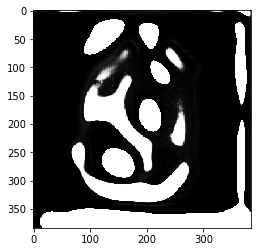

In [17]:
X, y = train_gen[0]
y_pred = model.predict(X)

In [11]:
plt.imshow(X[0,:,:,0], cmap="gray")

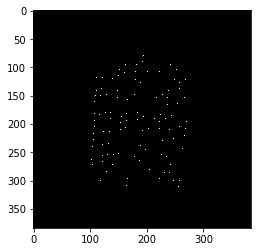

In [18]:
plt.imshow(y[0,:,:,0], cmap="gray")

In [ ]:
plt.imshow(y_pred[0,:,:,0], cmap="gray")